In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
from model import *
import matplotlib.pyplot as plt

2023-03-29 15:43:40.696780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 15:43:41.094632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-29 15:43:41.094669: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-29 15:43:42.598561: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# load all test data
x_test,y_test = load_pkl_data(test_pkl)
print("%d Validation Data loaded"%(len(x_test)))

383 Validation Data loaded


In [4]:
# load label maps
label2ind = load_dict_from_json(label2ind_json)
ind2label = load_dict_from_json(ind2label_json)
print("Labels loaded")
nc = len(label2ind.keys())
print("Total %d classes"%nc)

Labels loaded
Total 3 classes


In [5]:
model = AttentionClassifier(nc)
print("Model created")

2023-03-29 15:43:50.654197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 15:43:50.654762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-29 15:43:50.654928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-29 15:43:50.655004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-29 15:43:50.680917: W tensorflow/c

Model created


In [6]:
model.load_model("model/")

Model restored weights from None


In [38]:
# take a random data from test
n_test = len(x_test)
rand_idx = np.random.randint(0,n_test)
print("Random Index %d"%rand_idx)
test_text = x_test[rand_idx]
test_label = y_test[rand_idx]
print(test_text)
print("Label: %s"%test_label)

Random Index 99
पत्त्नी तो किसी की भी पत्त्नी हो उसका हसबैंड ड्रिंक english husband drink क्र रहा है तो उसको कुछ ना कुछ बोलेंगी ही।
Label: dd


In [39]:
word_attention,label = model.predict_with_explain(test_text,ind2label)
print("Predicted label: %s"%label)
print()
print("Word level attention")
print()
for w in word_attention:
    print(w[0],w[1])


intro
Predicted label: intro

Word level attention

[CLS] 0.027782097458839417
पत्त्नी 0.08328153192996979
तो 0.027782145887613297
किसी 0.02776734158396721
की 0.027743935585021973
भी 0.027789050713181496
पत्त्नी 0.08325383067131042
हो 0.02774673141539097
उसका 0.027796071022748947
हसबैंड 0.11115034855902195
ड्रिंक 0.08332918584346771
english 0.02774883806705475
husband 0.027820425108075142
drink 0.027784837409853935
क्र 0.02778949774801731
रहा 0.027738595381379128
है 0.0277777798473835
तो 0.027798287570476532
उसको 0.0277823768556118
कुछ 0.027794718742370605
ना 0.02781176008284092
कुछ 0.02778775990009308
बोलेंगी 0.05555106699466705
ही 0.027821529656648636
। 0.027788175269961357
[SEP] 0.027782097458839417


/home/ashish/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ashish/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ashish/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ashish/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2305 (\N{DEVANAGARI SIGN CANDRABINDU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ashish/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **

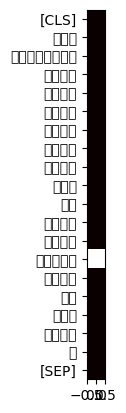

In [10]:
scores = []
words = []
for w,a in word_attention:
    scores.append(a)
    words.append(w)
# scores = np.log(scores)
plt.imshow(np.expand_dims(scores,1),cmap='hot')
plt.yticks(range(len(words)),words,rotation=0)
plt.show()

In [38]:
decoded = model.encoder_layer.preprocess_layer.decode(tf.squeeze(words,-1)) 
print(decoded)

InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:CPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 10 [Op:Squeeze]

In [34]:
sub_word_ids = model.encoder_layer.preprocess_layer.encode(test_tweet)
sub_word_dict = {}
for i,sw in enumerate(sub_word_ids):
    sub_word_dict[i] = sw
# print(sub_word_dict)
word_spans = []
subword_list = []
for k in sub_word_dict.keys():
    sid = sub_word_dict[k]
    sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(sid)
    if "##" in sub_word:
        word_spans[-1].append(k)
        subword_list[-1].append(sub_word)
    else:
        word_spans.append([k])
        subword_list.append([sub_word])
    # print(k,sid,sub_word)
for i,s in zip(word_spans,subword_list):
    print(i,s)
# all_spans = []
# for id_ in word_ids:
#     sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(id_)
#     if "##" in sub_word:
#         all_spans[-1].append(id_)
#     else:
#         all_spans.append([id_])
#     # print(id_,sub_word)
# word_span = {}
# for i,sp in enumerate(all_spans):
#     sub_list = []
#     sub_idx = []
#     for s in sp:
#         sub_word = model.encoder_layer.preprocess_layer.convert_ids_to_tokens(s)
#         sub_list.append(sub_word.replace("##",""))
#         sub_idx.append(s)
#     wd = ''.join(sub_list)
#     word_span[str(i)] = {"word":wd,"subword_index":sub_idx}
# print(word_span)


[0] ['[CLS]']
[1, 2] ['angel', '##is']
[3] ['yep']
[4] ['which']
[5] ['is']
[6, 7] ['mess', '##ier']
[8] ['more']
[9] ['dangerous']
[10] ['more']
[11] ['environmentally']
[12, 13, 14, 15] ['un', '##fr', '##ien', '##dly']
[16] ['than']
[17] ['their']
[18, 19, 20] ['re', '##tar', '##ded']
[21] ['new']
[22, 23] ['sp', '##outs']
[24] ['[SEP]']
